In [ ]:
import random
random.seed(707)

In [ ]:
import importlib
import labs
import augs
importlib.reload(augs)

importlib.reload(labs)
from labs import *
from augs import *

# Sample Images

In [ ]:
def get_image_stats(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return {
        'path': image_path,
        'mean': np.mean(gray),
        'std': np.std(gray),
        'min': np.min(gray),
        'max': np.max(gray)
    }

def get_rotation_angles(image_path, edge_thresh1=50, edge_thresh2=150):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, edge_thresh1, edge_thresh2)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
    angles = []
    if lines is not None:
        for rho, theta in lines[:, 0]:
            angle = (theta - np.pi/2) * (180/np.pi)
            if -90 < angle < 90:  # 필터링
                angles.append(angle)
    return angles

In [ ]:
def analyze_all_images(image_paths, set_name='train'):
    print(f"▶️ Analyzing {set_name} images...")
    
    stats_list = []
    all_angles = []

    for path in tqdm(image_paths):
        stats = get_image_stats(path)
        stats_list.append(stats)
        
        angles = get_rotation_angles(path)
        if angles:
            all_angles.extend(angles)
    
    # 수치 분석 시각화
    means = [s['mean'] for s in stats_list]
    stds = [s['std'] for s in stats_list]
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(means, bins=30, color='skyblue')
    plt.title(f"{set_name.capitalize()} Mean Brightness")
    
    plt.subplot(1, 2, 2)
    plt.hist(stds, bins=30, color='salmon')
    plt.title(f"{set_name.capitalize()} Std (Contrast)")
    plt.tight_layout()
    plt.show()
    
    # 회전 각도 분석 시각화
    if all_angles:
        plt.figure(figsize=(6, 4))
        plt.hist(all_angles, bins=60, color='orange')
        plt.title(f"{set_name.capitalize()} Rotation Angles (Hough)")
        plt.xlabel("Angle (degrees)")
        plt.ylabel("Count")
        plt.grid(True)
        plt.show()
    
    return stats_list, all_angles

In [ ]:
train_image_paths = grep_files("/root/upstg_CV/data/train", exts=['jpg'])


In [ ]:
train_stats, train_angles = analyze_all_images(train_image_paths, set_name='train')
test_stats, test_angles = analyze_all_images(test_image_paths, set_name='test')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_rotation_angles(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Canny Edge Detection
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    # Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)
    
    angles = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
            angles.append(angle)
    return angles


In [ ]:
# 테스트 데이터셋의 모든 이미지에 대해 각도 계산
train_image_paths = grep_files("/root/upstg_CV/data/train", exts=['jpg'])
test_image_paths = grep_files("/root/upstg_CV/data/test", exts=['jpg'])

def visualize_train_test_sets(train_paths, test_paths):

    def collect_stats(image_paths):
        stats_list = []
        all_angles = []

        for path in tqdm(image_paths):
            img = cv2.imread(path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            stats_list.append({
                'path': path,
                'mean': np.mean(gray),
                'std': np.std(gray),
            })

            edges = cv2.Canny(gray, 50, 150)
            lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
            if lines is not None:
                for rho, theta in lines[:, 0]:
                    angle = (theta - np.pi/2) * (180/np.pi)
                    if -90 < angle < 90:
                        all_angles.append(angle)

        return stats_list, all_angles

    # --- Train 분석 ---
    print("📘 Train 이미지 분석 중...")
    train_stats, train_angles = collect_stats(train_paths)

    # --- Test 분석 ---
    print("\n📙 Test 이미지 분석 중...")
    test_stats, test_angles = collect_stats(test_paths)

    def draw_stat_histogram(stats, angles, title_prefix):
        means = [s['mean'] for s in stats]
        stds = [s['std'] for s in stats]

        plt.figure(figsize=(18, 4))

        plt.subplot(1, 3, 1)
        plt.hist(means, bins=40, color='skyblue')
        plt.title(f"{title_prefix} - Mean Brightness distribution")
        plt.xlabel("Mean Brightness")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 2)
        plt.hist(stds, bins=40, color='lightcoral')
        plt.title(f"{title_prefix} - Brightness Standard Deviation (Contrast)")
        plt.xlabel("Std Dev")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        if angles:
            plt.hist(angles, bins=60, color='orange')
            plt.title(f"{title_prefix} - Rotation angle (Hough Transform)")
            plt.xlabel("Angle (degrees)")
            plt.ylabel("Count")
        else:
            plt.text(0.3, 0.5, "No angles detected", fontsize=12)
            plt.title(f"{title_prefix} - rotation angle")
        plt.tight_layout()
        plt.show()

    # --- 시각화 출력 ---
    draw_stat_histogram(train_stats, train_angles, "Train Set")
    draw_stat_histogram(test_stats, test_angles, "Test Set")

    return train_stats, train_angles, test_stats, test_angles


0it [00:00, ?it/s]

0it [00:00, ?it/s]

📘 Train 이미지 분석 중...


  0%|          | 0/3138 [00:00<?, ?it/s]


📙 Test 이미지 분석 중...


  0%|          | 0/3140 [00:00<?, ?it/s]

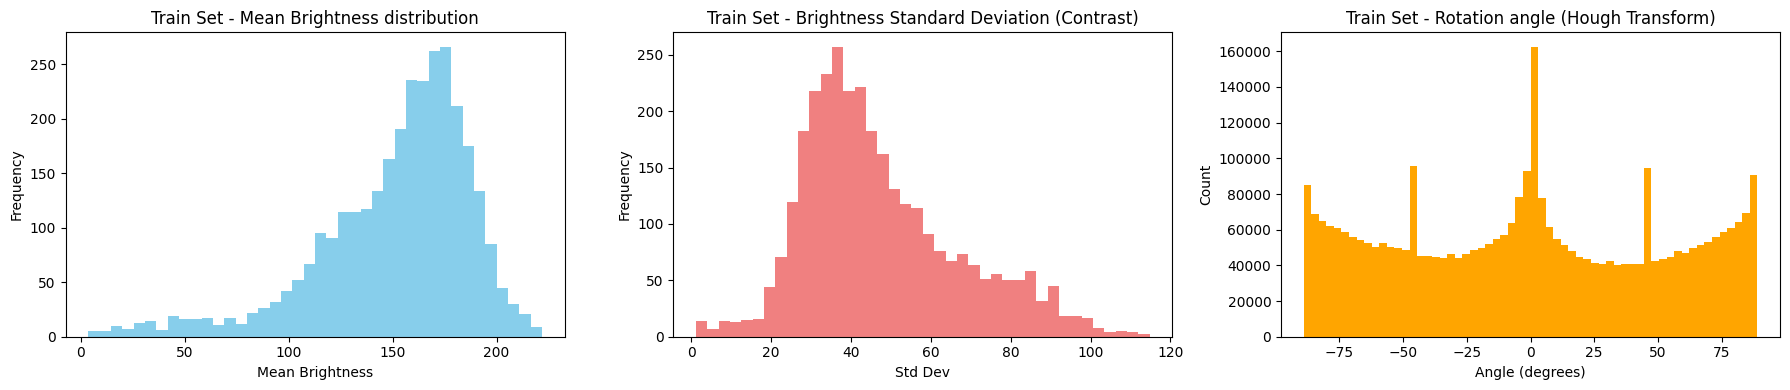

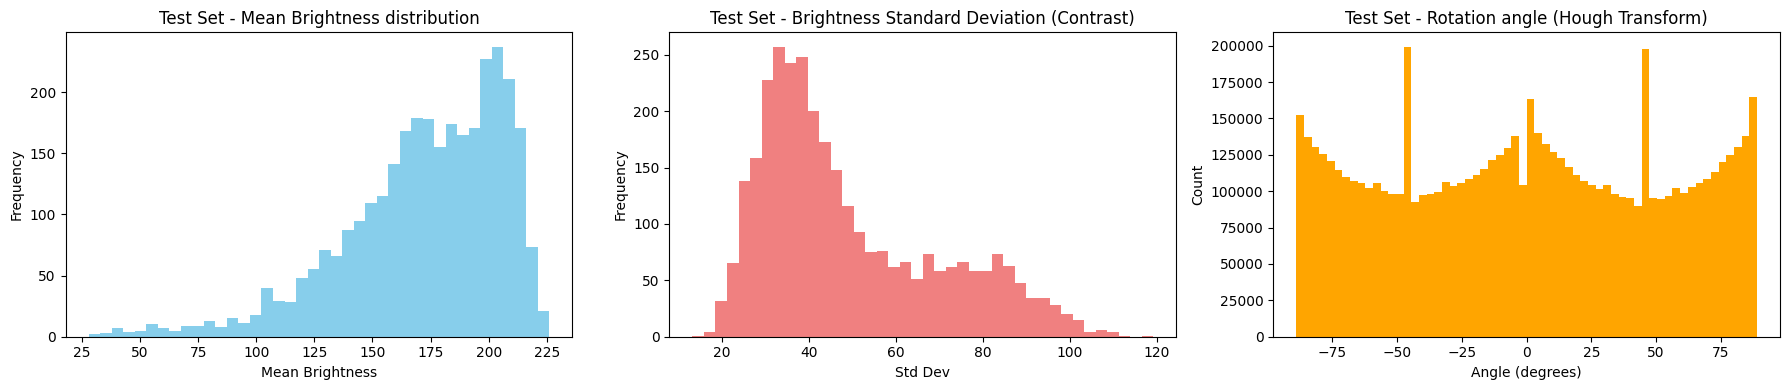

In [ ]:
train_stats, train_angles, test_stats, test_angles = visualize_train_test_sets(
    train_image_paths,
    test_image_paths
)

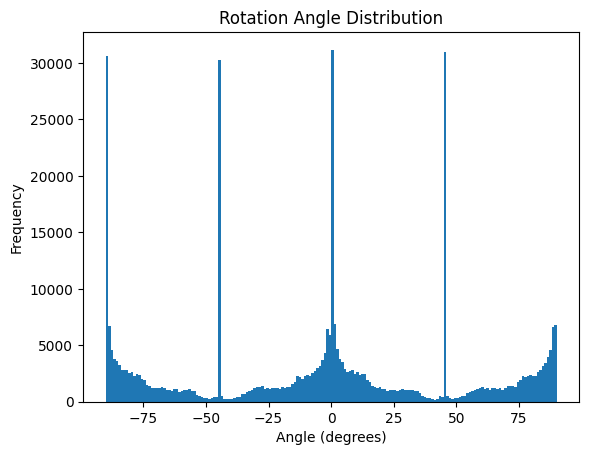

In [ ]:
# 테스트 데이터셋의 모든 이미지에 대해 각도 계산
all_angles = []
test_image_paths = grep_files("/root/upstg_CV/data/test", exts=['jpg'])
for img_path in test_image_paths:
    all_angles.extend(get_rotation_angles(img_path))

filtered_angles = [angle for angle in all_angles]
plt.hist(filtered_angles, bins=180)
plt.title("Rotation Angle Distribution")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

def grep_files(directory, exts):
    image_paths = []
    for ext in exts:
        image_paths.extend(glob(os.path.join(directory, '**', f'*.{ext}'), recursive=True))
    return image_paths


총 3140개의 이미지 해상도를 분석합니다.
처리 중: 0/3140 이미지 해상도
처리 중: 1000/3140 이미지 해상도
처리 중: 2000/3140 이미지 해상도
처리 중: 3000/3140 이미지 해상도


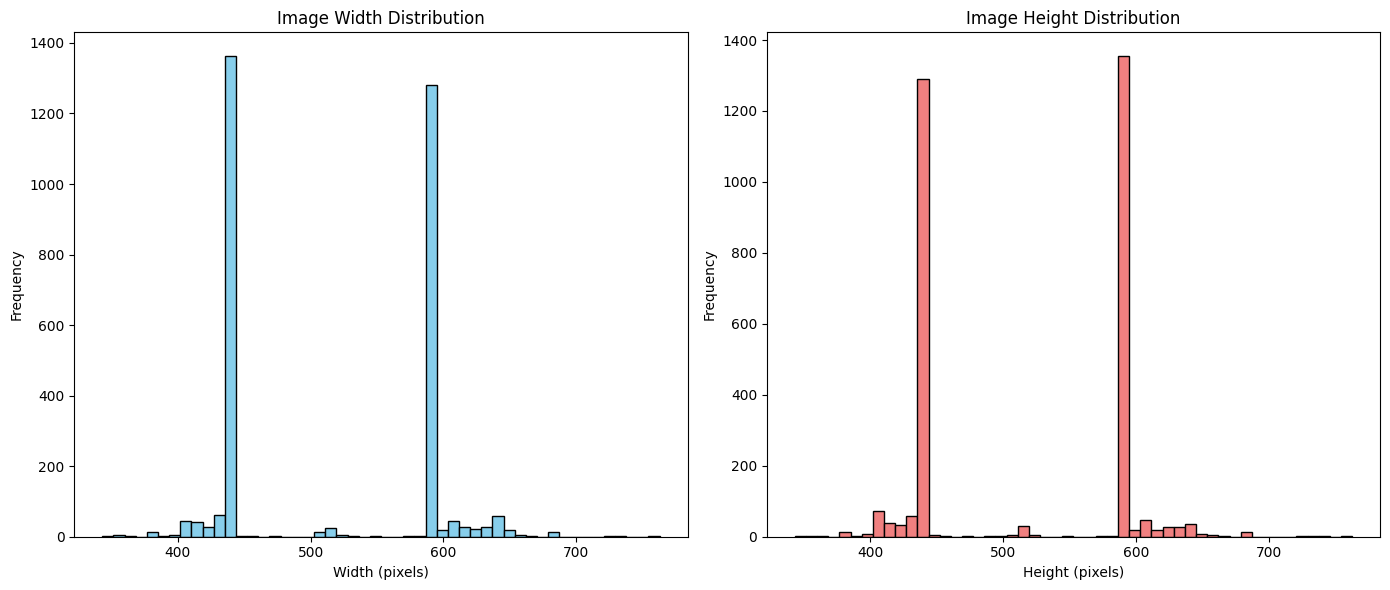

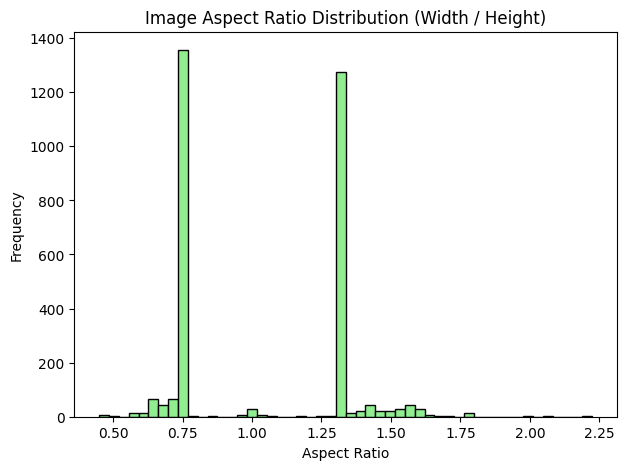

In [ ]:
# 테스트 데이터셋의 모든 이미지 해상도 수집
all_resolutions = []
test_image_paths = grep_files("/root/upstg_CV/data/test", exts=['jpg', 'png', 'jpeg', 'bmp', 'tiff']) # 다양한 이미지 확장자 추가

print(f"총 {len(test_image_paths)}개의 이미지 해상도를 분석합니다.")

if not test_image_paths:
    print("경고: 지정된 경로에서 이미지를 찾을 수 없습니다.")
    # 더미 데이터 생성 (예시)
    dummy_resolutions = [(np.random.randint(500, 1500), np.random.randint(500, 2000)) for _ in range(1000)]
    all_resolutions.extend(dummy_resolutions)
else:
    for i, img_path in enumerate(test_image_paths):
        if i % 1000 == 0:
            print(f"처리 중: {i}/{len(test_image_paths)} 이미지 해상도")
        try:
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                all_resolutions.append((w, h)) # (가로, 세로)
            else:
                print(f"경고: 이미지를 로드할 수 없습니다: {img_path}")
        except Exception as e:
            print(f"오류 발생 ({img_path}): {e}")

# 해상도 분포 시각화
if all_resolutions:
    widths = [res[0] for res in all_resolutions]
    heights = [res[1] for res in all_resolutions]

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
    plt.title("Image Width Distribution")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=50, color='lightcoral', edgecolor='black')
    plt.title("Image Height Distribution")
    plt.xlabel("Height (pixels)")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # 가로세로 비율 분포도 확인
    aspect_ratios = []
    for w, h in all_resolutions:
        if h != 0: # 0으로 나누는 오류 방지
            aspect_ratios.append(w / h)

    plt.figure(figsize=(7, 5))
    plt.hist(aspect_ratios, bins=50, color='lightgreen', edgecolor='black')
    plt.title("Image Aspect Ratio Distribution (Width / Height)")
    plt.xlabel("Aspect Ratio")
    plt.ylabel("Frequency")
    plt.show()

else:
    print("분석할 해상도 데이터가 없습니다.")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

def grep_files(directory, exts):
    image_paths = []
    for ext in exts:
        image_paths.extend(glob(os.path.join(directory, '**', f'*.{ext}'), recursive=True))
    return image_paths

# 이진화해서 시각화하여 잘나오는지 봐보기
def get_content_area_ratio(image_path, threshold=200):
    """
    이미지에서 흰색 배경이 아닌 콘텐츠 영역의 비율을 추정합니다.
    threshold 값보다 낮은 픽셀 값 (어두운 영역)을 콘텐츠로 간주합니다.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    # 이진화: 배경(흰색)을 255, 콘텐츠(어두운색)를 0으로 만듭니다.
    _, binary_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)

    # 콘텐츠 픽셀 수 계산
    content_pixels = np.sum(binary_img > 0) # 0이 아닌 픽셀 (콘텐츠)

    total_pixels = img.shape[0] * img.shape[1]
    if total_pixels == 0:
        return 0 # 이미지 크기가 0인 경우

    return content_pixels / total_pixels


총 1569개의 이미지 콘텐츠 영역 비율을 분석합니다.
처리 중: 0/1569 이미지 콘텐츠 비율
처리 중: 1000/1569 이미지 콘텐츠 비율


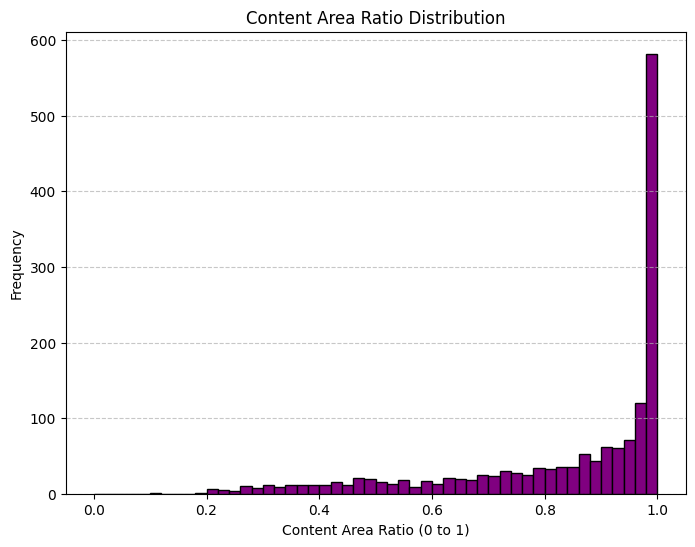

In [ ]:
# 테스트 데이터셋의 모든 이미지 콘텐츠 영역 비율 수집
all_content_ratios = []
train_image_paths = grep_files("/root/upstg_CV/data/train", exts=['jpg', 'png', 'jpeg', 'bmp', 'tiff'])

print(f"총 {len(train_image_paths)}개의 이미지 콘텐츠 영역 비율을 분석합니다.")

if not train_image_paths:
    print("경고: 지정된 경로에서 이미지를 찾을 수 없습니다.")
    # 더미 데이터 생성 (예시: 0.5 ~ 0.9 범위의 비율)
    dummy_ratios = np.random.uniform(0.5, 0.9, 1000)
    all_content_ratios.extend(dummy_ratios)
else:
    for i, img_path in enumerate(train_image_paths):
        if i % 1000 == 0:
            print(f"처리 중: {i}/{len(train_image_paths)} 이미지 콘텐츠 비율")
        ratio = get_content_area_ratio(img_path)
        if ratio is not None:
            all_content_ratios.append(ratio)

# 콘텐츠 영역 비율 분포 시각화
if all_content_ratios:
    plt.figure(figsize=(8, 6))
    plt.hist(all_content_ratios, bins=50, range=(0, 1), color='purple', edgecolor='black')
    plt.title("Content Area Ratio Distribution")
    plt.xlabel("Content Area Ratio (0 to 1)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("분석할 콘텐츠 영역 비율 데이터가 없습니다.")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

def grep_files(directory, exts):
    image_paths = []
    for ext in exts:
        image_paths.extend(glob(os.path.join(directory, '**', f'*.{ext}'), recursive=True))
    return image_paths

def estimate_noise_level(image_path, filter_size=3):
    """
    Median Filter를 적용하여 이미지의 노이즈 레벨을 추정합니다.
    원본 이미지와 필터링된 이미지 간의 절대 평균 차이를 노이즈 레벨로 간주합니다.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    # 노이즈 제거를 위한 Median Filter 적용
    denoised_img = cv2.medianBlur(img, filter_size)

    # 원본과 노이즈 제거된 이미지 간의 차이 계산
    # 차이의 절대값을 취하고 평균을 계산
    noise_diff = np.mean(np.abs(img.astype(np.float32) - denoised_img.astype(np.float32)))
    return noise_diff

총 1569개의 이미지 노이즈 레벨을 분석합니다.
처리 중: 0/1569 이미지 노이즈 레벨
처리 중: 100/1569 이미지 노이즈 레벨
처리 중: 200/1569 이미지 노이즈 레벨
처리 중: 300/1569 이미지 노이즈 레벨
처리 중: 400/1569 이미지 노이즈 레벨
처리 중: 500/1569 이미지 노이즈 레벨
처리 중: 600/1569 이미지 노이즈 레벨
처리 중: 700/1569 이미지 노이즈 레벨
처리 중: 800/1569 이미지 노이즈 레벨
처리 중: 900/1569 이미지 노이즈 레벨
처리 중: 1000/1569 이미지 노이즈 레벨
처리 중: 1100/1569 이미지 노이즈 레벨
처리 중: 1200/1569 이미지 노이즈 레벨
처리 중: 1300/1569 이미지 노이즈 레벨
처리 중: 1400/1569 이미지 노이즈 레벨
처리 중: 1500/1569 이미지 노이즈 레벨


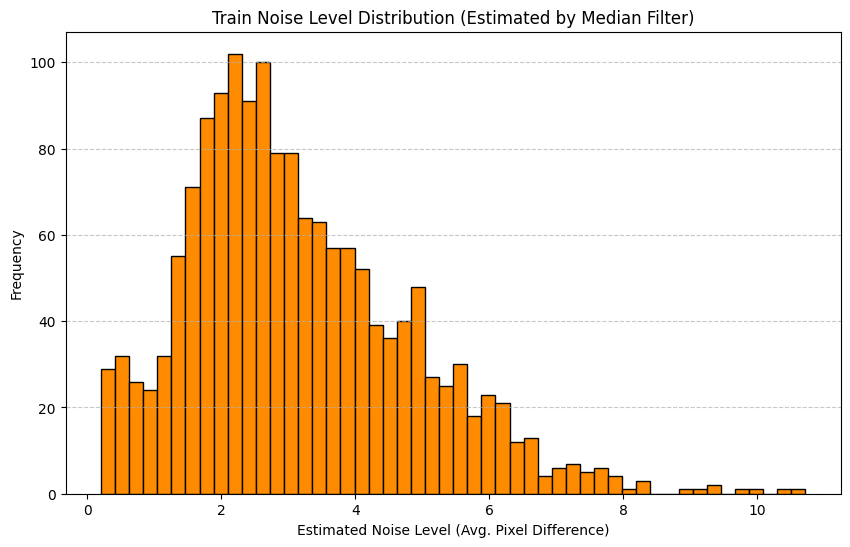

In [ ]:
# 필터링이 잘됬을지 미지수? 노이즈의 종류가 Median 블러가 아닌 다른 블러가 걸렸으면 픽셀차이를 냈을 떄 잘못 나올 수 있음

# 테스트 데이터셋의 모든 이미지 노이즈 레벨 수집
all_noise_levels = []
train_image_paths = grep_files("/root/upstg_CV/data/train", exts=['jpg', 'png', 'jpeg', 'bmp', 'tiff'])

print(f"총 {len(train_image_paths)}개의 이미지 노이즈 레벨을 분석합니다.")

if not train_image_paths:
    print("경고: 지정된 경로에서 이미지를 찾을 수 없습니다.")
    # 더미 데이터 생성 (예시: 0 ~ 30 범위의 노이즈 레벨)
    dummy_noise_levels = np.random.uniform(0, 30, 1000)
    all_noise_levels.extend(dummy_noise_levels)
else:
    for i, img_path in enumerate(train_image_paths):
        if i % 100 == 0: # 100개마다 진행 상황 출력
            print(f"처리 중: {i}/{len(train_image_paths)} 이미지 노이즈 레벨")
        noise_level = estimate_noise_level(img_path)
        if noise_level is not None:
            all_noise_levels.append(noise_level)

# 노이즈 레벨 분포 시각화
if all_noise_levels:
    plt.figure(figsize=(10, 6))
    plt.hist(all_noise_levels, bins=50, color='darkorange', edgecolor='black')
    plt.title("Train Noise Level Distribution (Estimated by Median Filter)")
    plt.xlabel("Estimated Noise Level (Avg. Pixel Difference)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("분석할 노이즈 레벨 데이터가 없습니다.")

총 3140개의 이미지 노이즈 레벨을 분석합니다.
처리 중: 0/3140 이미지 노이즈 레벨
처리 중: 100/3140 이미지 노이즈 레벨
처리 중: 200/3140 이미지 노이즈 레벨
처리 중: 300/3140 이미지 노이즈 레벨
처리 중: 400/3140 이미지 노이즈 레벨
처리 중: 500/3140 이미지 노이즈 레벨
처리 중: 600/3140 이미지 노이즈 레벨
처리 중: 700/3140 이미지 노이즈 레벨
처리 중: 800/3140 이미지 노이즈 레벨
처리 중: 900/3140 이미지 노이즈 레벨
처리 중: 1000/3140 이미지 노이즈 레벨
처리 중: 1100/3140 이미지 노이즈 레벨
처리 중: 1200/3140 이미지 노이즈 레벨
처리 중: 1300/3140 이미지 노이즈 레벨
처리 중: 1400/3140 이미지 노이즈 레벨
처리 중: 1500/3140 이미지 노이즈 레벨
처리 중: 1600/3140 이미지 노이즈 레벨
처리 중: 1700/3140 이미지 노이즈 레벨
처리 중: 1800/3140 이미지 노이즈 레벨
처리 중: 1900/3140 이미지 노이즈 레벨
처리 중: 2000/3140 이미지 노이즈 레벨
처리 중: 2100/3140 이미지 노이즈 레벨
처리 중: 2200/3140 이미지 노이즈 레벨
처리 중: 2300/3140 이미지 노이즈 레벨
처리 중: 2400/3140 이미지 노이즈 레벨
처리 중: 2500/3140 이미지 노이즈 레벨
처리 중: 2600/3140 이미지 노이즈 레벨
처리 중: 2700/3140 이미지 노이즈 레벨
처리 중: 2800/3140 이미지 노이즈 레벨
처리 중: 2900/3140 이미지 노이즈 레벨
처리 중: 3000/3140 이미지 노이즈 레벨
처리 중: 3100/3140 이미지 노이즈 레벨


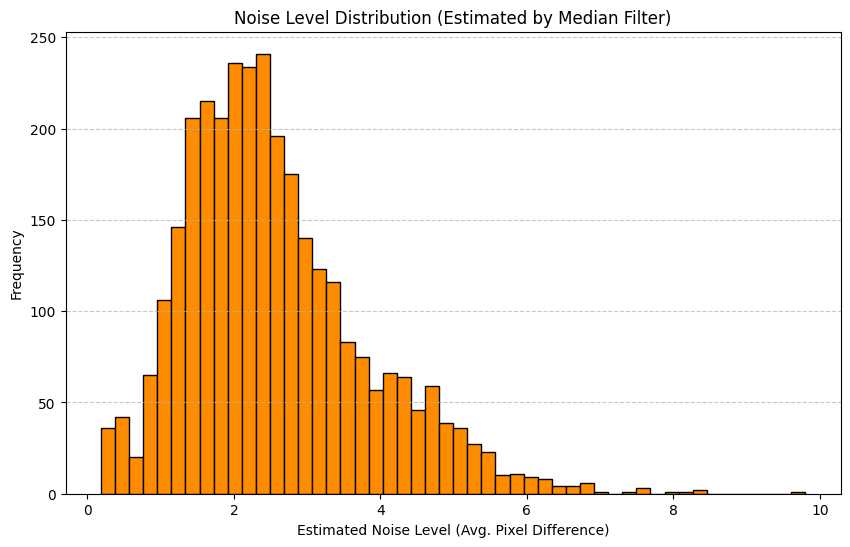

In [ ]:
# 필터링이 잘됬을지 미지수? 노이즈의 종류가 Median 블러가 아닌 다른 블러가 걸렸으면 픽셀차이를 냈을 떄 잘못 나올 수 있음

# 테스트 데이터셋의 모든 이미지 노이즈 레벨 수집
all_noise_levels = []
test_image_paths = grep_files("/root/upstg_CV/data/test", exts=['jpg', 'png', 'jpeg', 'bmp', 'tiff'])

print(f"총 {len(test_image_paths)}개의 이미지 노이즈 레벨을 분석합니다.")

if not test_image_paths:
    print("경고: 지정된 경로에서 이미지를 찾을 수 없습니다.")
    # 더미 데이터 생성 (예시: 0 ~ 30 범위의 노이즈 레벨)
    dummy_noise_levels = np.random.uniform(0, 30, 1000)
    all_noise_levels.extend(dummy_noise_levels)
else:
    for i, img_path in enumerate(test_image_paths):
        if i % 100 == 0: # 100개마다 진행 상황 출력
            print(f"처리 중: {i}/{len(test_image_paths)} 이미지 노이즈 레벨")
        noise_level = estimate_noise_level(img_path)
        if noise_level is not None:
            all_noise_levels.append(noise_level)

# 노이즈 레벨 분포 시각화
if all_noise_levels:
    plt.figure(figsize=(10, 6))
    plt.hist(all_noise_levels, bins=50, color='darkorange', edgecolor='black')
    plt.title("Noise Level Distribution (Estimated by Median Filter)")
    plt.xlabel("Estimated Noise Level (Avg. Pixel Difference)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("분석할 노이즈 레벨 데이터가 없습니다.")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

def grep_files(directory, exts):
    image_paths = []
    for ext in exts:
        image_paths.extend(glob(os.path.join(directory, '**', f'*.{ext}'), recursive=True))
    return image_paths

def estimate_blur_level(image_path):
    """
    이미지의 블러 레벨을 Laplacian Variance를 사용하여 추정합니다.
    값이 낮을수록 블러가 심합니다.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    # Laplacian 필터 적용 후 분산 계산
    # cv2.CV_64F는 출력 이미지의 데이터 타입을 64비트 부동소수점으로 설정합니다.
    # 이는 오버플로우를 방지하고 더 정확한 값을 얻기 위함입니다.
    laplacian_variance = cv2.Laplacian(img, cv2.CV_64F).var()
    return laplacian_variance


총 1569개의 이미지 블러 레벨을 분석합니다.
처리 중: 0/1569 이미지 블러 레벨
처리 중: 100/1569 이미지 블러 레벨
처리 중: 200/1569 이미지 블러 레벨
처리 중: 300/1569 이미지 블러 레벨
처리 중: 400/1569 이미지 블러 레벨
처리 중: 500/1569 이미지 블러 레벨
처리 중: 600/1569 이미지 블러 레벨
처리 중: 700/1569 이미지 블러 레벨
처리 중: 800/1569 이미지 블러 레벨
처리 중: 900/1569 이미지 블러 레벨
처리 중: 1000/1569 이미지 블러 레벨
처리 중: 1100/1569 이미지 블러 레벨
처리 중: 1200/1569 이미지 블러 레벨
처리 중: 1300/1569 이미지 블러 레벨
처리 중: 1400/1569 이미지 블러 레벨
처리 중: 1500/1569 이미지 블러 레벨


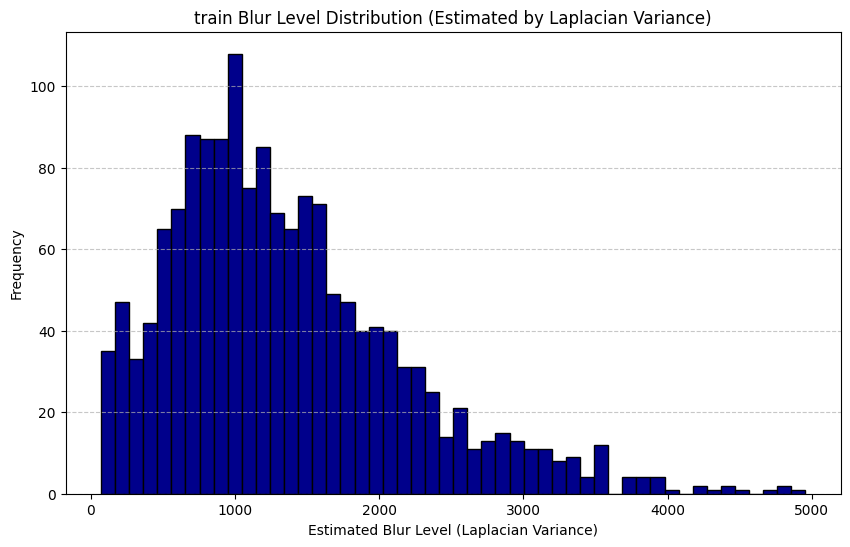

In [ ]:
# 테스트 데이터셋의 모든 이미지 블러 레벨 수집
all_blur_levels = []
train_image_paths = grep_files("/root/upstg_CV/data/train", exts=['jpg', 'png', 'jpeg', 'bmp', 'tiff'])

print(f"총 {len(train_image_paths)}개의 이미지 블러 레벨을 분석합니다.")

if not train_image_paths:
    print("경고: 지정된 경로에서 이미지를 찾을 수 없습니다.")
    # 더미 데이터 생성 (예시: 0 ~ 1000 범위의 블러 레벨)
    dummy_blur_levels = np.random.uniform(0, 1000, 1000)
    all_blur_levels.extend(dummy_blur_levels)
else:
    for i, img_path in enumerate(train_image_paths):
        if i % 100 == 0:
            print(f"처리 중: {i}/{len(train_image_paths)} 이미지 블러 레벨")
        blur_level = estimate_blur_level(img_path)
        if blur_level is not None:
            all_blur_levels.append(blur_level)

# 블러 레벨 분포 시각화
if all_blur_levels:
    plt.figure(figsize=(10, 6))
    plt.hist(all_blur_levels, bins=50, color='darkblue', edgecolor='black')
    plt.title("train Blur Level Distribution (Estimated by Laplacian Variance)")
    plt.xlabel("Estimated Blur Level (Laplacian Variance)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("분석할 블러 레벨 데이터가 없습니다.")

총 3140개의 이미지 블러 레벨을 분석합니다.
처리 중: 0/3140 이미지 블러 레벨
처리 중: 100/3140 이미지 블러 레벨
처리 중: 200/3140 이미지 블러 레벨
처리 중: 300/3140 이미지 블러 레벨
처리 중: 400/3140 이미지 블러 레벨
처리 중: 500/3140 이미지 블러 레벨
처리 중: 600/3140 이미지 블러 레벨
처리 중: 700/3140 이미지 블러 레벨
처리 중: 800/3140 이미지 블러 레벨
처리 중: 900/3140 이미지 블러 레벨
처리 중: 1000/3140 이미지 블러 레벨
처리 중: 1100/3140 이미지 블러 레벨
처리 중: 1200/3140 이미지 블러 레벨
처리 중: 1300/3140 이미지 블러 레벨
처리 중: 1400/3140 이미지 블러 레벨
처리 중: 1500/3140 이미지 블러 레벨
처리 중: 1600/3140 이미지 블러 레벨
처리 중: 1700/3140 이미지 블러 레벨
처리 중: 1800/3140 이미지 블러 레벨
처리 중: 1900/3140 이미지 블러 레벨
처리 중: 2000/3140 이미지 블러 레벨
처리 중: 2100/3140 이미지 블러 레벨
처리 중: 2200/3140 이미지 블러 레벨
처리 중: 2300/3140 이미지 블러 레벨
처리 중: 2400/3140 이미지 블러 레벨
처리 중: 2500/3140 이미지 블러 레벨
처리 중: 2600/3140 이미지 블러 레벨
처리 중: 2700/3140 이미지 블러 레벨
처리 중: 2800/3140 이미지 블러 레벨
처리 중: 2900/3140 이미지 블러 레벨
처리 중: 3000/3140 이미지 블러 레벨
처리 중: 3100/3140 이미지 블러 레벨


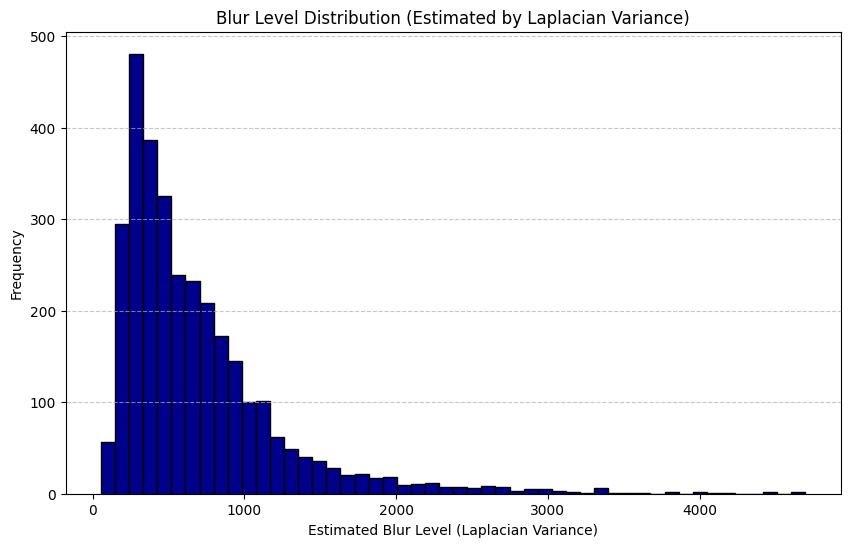

In [ ]:
# 테스트 데이터셋의 모든 이미지 블러 레벨 수집
all_blur_levels = []
test_image_paths = grep_files("/root/upstg_CV/data/test", exts=['jpg', 'png', 'jpeg', 'bmp', 'tiff'])

print(f"총 {len(test_image_paths)}개의 이미지 블러 레벨을 분석합니다.")

if not test_image_paths:
    print("경고: 지정된 경로에서 이미지를 찾을 수 없습니다.")
    # 더미 데이터 생성 (예시: 0 ~ 1000 범위의 블러 레벨)
    dummy_blur_levels = np.random.uniform(0, 1000, 1000)
    all_blur_levels.extend(dummy_blur_levels)
else:
    for i, img_path in enumerate(test_image_paths):
        if i % 100 == 0:
            print(f"처리 중: {i}/{len(test_image_paths)} 이미지 블러 레벨")
        blur_level = estimate_blur_level(img_path)
        if blur_level is not None:
            all_blur_levels.append(blur_level)

# 블러 레벨 분포 시각화
if all_blur_levels:
    plt.figure(figsize=(10, 6))
    plt.hist(all_blur_levels, bins=50, color='darkblue', edgecolor='black')
    plt.title("Blur Level Distribution (Estimated by Laplacian Variance)")
    plt.xlabel("Estimated Blur Level (Laplacian Variance)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("분석할 블러 레벨 데이터가 없습니다.")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

def grep_files(directory, exts):
    image_paths = []
    for ext in exts:
        image_paths.extend(glob(os.path.join(directory, '**', f'*.{ext}'), recursive=True))
    return image_paths

def analyze_color_brightness(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"이미지 로드 실패: {image_path}")
        return None, None, None, None

    # OpenCV는 BGR 순서로 로드하므로 RGB로 변환
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 1. 평균 밝기 (Grayscale)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(img_gray)

    # 2. RGB 채널별 평균
    mean_r = np.mean(img_rgb[:,:,0])
    mean_g = np.mean(img_rgb[:,:,1])
    mean_b = np.mean(img_rgb[:,:,2])

    return mean_brightness, mean_r, mean_g, mean_b

총 3140개의 테스트 이미지 색상/밝기 레벨을 분석합니다.
처리 중: 0/3140 이미지
처리 중: 100/3140 이미지
처리 중: 200/3140 이미지
처리 중: 300/3140 이미지
처리 중: 400/3140 이미지
처리 중: 500/3140 이미지
처리 중: 600/3140 이미지
처리 중: 700/3140 이미지
처리 중: 800/3140 이미지
처리 중: 900/3140 이미지
처리 중: 1000/3140 이미지
처리 중: 1100/3140 이미지
처리 중: 1200/3140 이미지
처리 중: 1300/3140 이미지
처리 중: 1400/3140 이미지
처리 중: 1500/3140 이미지
처리 중: 1600/3140 이미지
처리 중: 1700/3140 이미지
처리 중: 1800/3140 이미지
처리 중: 1900/3140 이미지
처리 중: 2000/3140 이미지
처리 중: 2100/3140 이미지
처리 중: 2200/3140 이미지
처리 중: 2300/3140 이미지
처리 중: 2400/3140 이미지
처리 중: 2500/3140 이미지
처리 중: 2600/3140 이미지
처리 중: 2700/3140 이미지
처리 중: 2800/3140 이미지
처리 중: 2900/3140 이미지
처리 중: 3000/3140 이미지
처리 중: 3100/3140 이미지


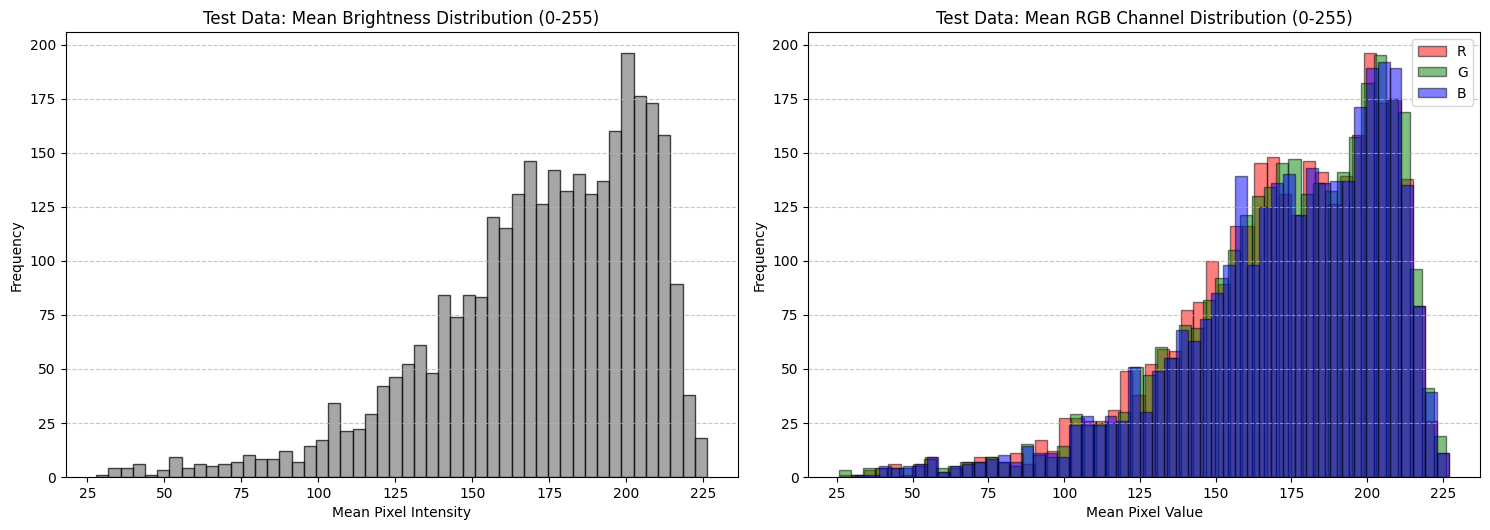

In [ ]:

# 비교를 위해서 train dataset에서 test datset 비교를 하는게 좋을듯 편차 값으로 분포가 비교할 수 있음 

# 테스트 데이터셋 경로
test_image_dir = "/root/upstg_CV/data/test" # 실제 테스트 데이터 경로로 변경 필요
image_exts = ['jpg', 'png', 'jpeg', 'bmp', 'tiff']

test_image_paths = grep_files(test_image_dir, exts=image_exts)

all_mean_brightness = []
all_mean_r = []
all_mean_g = []
all_mean_b = []

print(f"총 {len(test_image_paths)}개의 테스트 이미지 색상/밝기 레벨을 분석합니다.")

if not test_image_paths:
    print(f"경고: {test_image_dir} 경로에서 이미지를 찾을 수 없습니다. 시각화를 건너뜁니다.")
    # 더미 데이터 생성 (예시)
    dummy_data = np.random.uniform(50, 200, 1000)
    all_mean_brightness.extend(dummy_data)
    all_mean_r.extend(np.random.uniform(50, 200, 1000))
    all_mean_g.extend(np.random.uniform(50, 200, 1000))
    all_mean_b.extend(np.random.uniform(50, 200, 1000))
else:
    for i, img_path in enumerate(test_image_paths):
        if i % 100 == 0:
            print(f"처리 중: {i}/{len(test_image_paths)} 이미지")
        mb, mr, mg, mb_val = analyze_color_brightness(img_path)
        if mb is not None:
            all_mean_brightness.append(mb)
            all_mean_r.append(mr)
            all_mean_g.append(mg)
            all_mean_b.append(mb_val)

# 시각화
if all_mean_brightness:
    plt.figure(figsize=(15, 10))

    # 1. 평균 밝기 분포
    plt.subplot(2, 2, 1)
    plt.hist(all_mean_brightness, bins=50, color='gray', edgecolor='black', alpha=0.7)
    plt.title("Test Data: Mean Brightness Distribution (0-255)")
    plt.xlabel("Mean Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. RGB 채널별 평균 분포
    plt.subplot(2, 2, 2)
    plt.hist(all_mean_r, bins=50, color='red', edgecolor='black', alpha=0.5, label='R')
    plt.hist(all_mean_g, bins=50, color='green', edgecolor='black', alpha=0.5, label='G')
    plt.hist(all_mean_b, bins=50, color='blue', edgecolor='black', alpha=0.5, label='B')
    plt.title("Test Data: Mean RGB Channel Distribution (0-255)")
    plt.xlabel("Mean Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("분석할 테스트 데이터가 없습니다.")

총 1569개의 테스트 이미지 색상/밝기 레벨을 분석합니다.
처리 중: 0/1569 이미지
처리 중: 100/1569 이미지
처리 중: 200/1569 이미지
처리 중: 300/1569 이미지
처리 중: 400/1569 이미지
처리 중: 500/1569 이미지
처리 중: 600/1569 이미지
처리 중: 700/1569 이미지
처리 중: 800/1569 이미지
처리 중: 900/1569 이미지
처리 중: 1000/1569 이미지
처리 중: 1100/1569 이미지
처리 중: 1200/1569 이미지
처리 중: 1300/1569 이미지
처리 중: 1400/1569 이미지
처리 중: 1500/1569 이미지


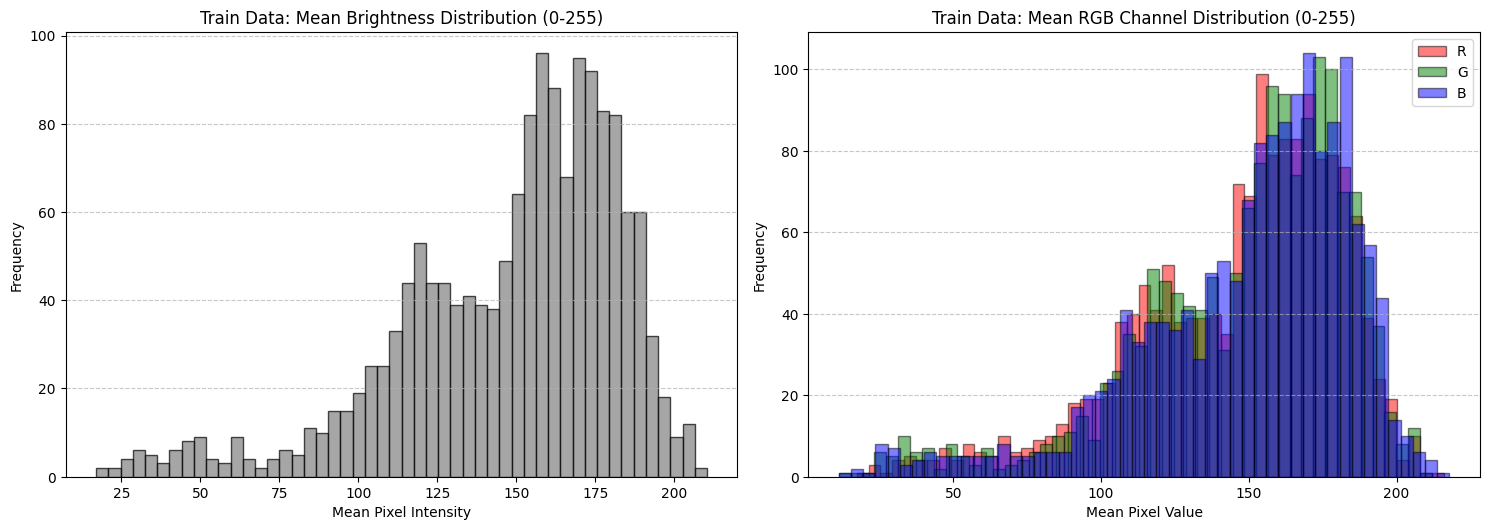

In [ ]:
# train 데이터셋 경로
train_image_dir = "/root/upstg_CV/data/train" # 실제 테스트 데이터 경로로 변경 필요
image_exts = ['jpg', 'png', 'jpeg', 'bmp', 'tiff']

train_image_paths = grep_files(train_image_dir, exts=image_exts)

all_mean_brightness = []
all_mean_r = []
all_mean_g = []
all_mean_b = []

print(f"총 {len(train_image_paths)}개의 테스트 이미지 색상/밝기 레벨을 분석합니다.")

if not train_image_paths:
    print(f"경고: {test_image_dir} 경로에서 이미지를 찾을 수 없습니다. 시각화를 건너뜁니다.")
    # 더미 데이터 생성 (예시)
    dummy_data = np.random.uniform(50, 200, 1000)
    all_mean_brightness.extend(dummy_data)
    all_mean_r.extend(np.random.uniform(50, 200, 1000))
    all_mean_g.extend(np.random.uniform(50, 200, 1000))
    all_mean_b.extend(np.random.uniform(50, 200, 1000))
else:
    for i, img_path in enumerate(train_image_paths):
        if i % 100 == 0:
            print(f"처리 중: {i}/{len(train_image_paths)} 이미지")
        mb, mr, mg, mb_val = analyze_color_brightness(img_path)
        if mb is not None:
            all_mean_brightness.append(mb)
            all_mean_r.append(mr)
            all_mean_g.append(mg)
            all_mean_b.append(mb_val)

# 시각화
if all_mean_brightness:
    plt.figure(figsize=(15, 10))

    # 1. 평균 밝기 분포
    plt.subplot(2, 2, 1)
    plt.hist(all_mean_brightness, bins=50, color='gray', edgecolor='black', alpha=0.7)
    plt.title("Train Data: Mean Brightness Distribution (0-255)")
    plt.xlabel("Mean Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. RGB 채널별 평균 분포
    plt.subplot(2, 2, 2)
    plt.hist(all_mean_r, bins=50, color='red', edgecolor='black', alpha=0.5, label='R')
    plt.hist(all_mean_g, bins=50, color='green', edgecolor='black', alpha=0.5, label='G')
    plt.hist(all_mean_b, bins=50, color='blue', edgecolor='black', alpha=0.5, label='B')
    plt.title("Train Data: Mean RGB Channel Distribution (0-255)")
    plt.xlabel("Mean Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("분석할 테스트 데이터가 없습니다.")